In [171]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
import tqdm as tq
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation
import winsound
Freq = 1500 # Set Frequency To 2500 Hertz
Dur = 1000 # Set Duration To 1000 ms == 1 second


In [172]:
l=5

In [173]:
# t.exp(x)
# t.sin(x)
# t.lop(1+t.exp(x))
R=t.pi
b=1
eta=1


def act(x):
    return t.sin(x)
#t.log(1+t.exp(x))

def dact(x):
    return t.cos(x)
#t.exp(x)/(1+t.exp(x))

def ddact(x):
    return -t.sin(x)
#(t.exp(x)*(1+t.exp(x))-t.exp(x)**2)/(1+t.exp(x))**2

def dddact(x):
    return -t.cos(x)
#(t.exp(x)*(1-t.exp(x)))/(1+t.exp(x))**3

def L2(c,w,x):
    a=0
    n=x.size(0)
    for i in range(n):
        a=a+net(c,w,x[i])**2
    return (R/n)*a

def E(x,c,w):
    a=0
    n=x.size(0)
    m=c.size(0)
    norm=0
    for i in range(n):
        e=0
        p=0
        z=0
        norm=norm+0 #(t.matmul(c,act(w*x[i]))**2 -1/t.pi )
        for j in range(m):
            e=e+c[j]*((w[j]**2)*ddact(w[j]*x[i])+l*act(w[j]*x[i]))
            p=p+c[j]*act(w[j]*t.pi)
            z=z+c[j]*act(t.zeros(1))
        a=a+e**2+p**2+z**2 
    return a+((t.pi/n)*norm)**2

def net(c,w,x):
    return t.matmul(c,act(w*x))

def dnet(c,w,x):
    return t.matmul(c*w,dact(w*x))

def ddnet(c,w,x):
    return t.matmul(c*w*w,ddact(w*x))


def grad(x,c,w):
    m=c.size(0)
    n=x.size(0)
    c_grad=t.randn(m)
    w_grad=t.randn(m)
    for i in range(n):
        c_1=2*(ddnet(c,w,x[i])-b*net(c,w,x[i])+l*net(c,w,x[i]))*((w**2)*ddact(w*x[i])-b*act(w*x[i])+l*act(w*x[i]))
        c_2=2*net(c,w,t.pi)*act(w*t.pi)
        c_3=2*net(c,w,t.zeros(1))*act(w*t.zeros(1))
        c_n=4*(L2(c,w,x)-1)*net(c,w,x[i])*act(w*x[i])
        w_1=2*(ddnet(c,w,x[i])-b*net(c,w,x[i])+l*net(c,w,x[i]))*(c*(2*(w)*ddact(w*x[i])+x[i]*(w**2)*dddact(w*x[i]))-b*c*x[i]*dact(w*x[i])+l*c*x[i]*dact(w*x[i]))
        w_2=2*net(c,w,t.pi)*c*t.pi*dact(t.pi*w)
        w_3=2*net(c,w,t.zeros(1))*c*t.zeros(1)*dact(w*t.zeros(1))
        w_n=4*(L2(c,w,x)-1)*net(c,w,x[i])*c*dact(w*x[i])*x[i]
        c_grad=c_grad+c_1+c_2+c_3+c_n
        w_grad=w_grad+w_1+w_2+w_3+w_n
    return c_grad, w_grad

def optimization(n,m,T,r):
    print('Optimization started')
    x=t.tensor([i*(t.pi/n) for i in range(n)])
    w=t.randn(m)
    c=t.randn(m)
    Error=t.zeros(T)
    L2_Error=t.zeros(T)
    plots=[]
    for k in tq.tqdm(range(T)):
        G=grad(x,c,w)
        c=c-r*G[0]
        w=w-r*G[1]
        Error[k]=E(x,c,w)
        L2_Error[k]=L2(c,w,x)
        if np.isnan(Error[k])==True:
            break
        a=t.tensor([net(c,w,x[i]) for i in range(n)])
        plt.plot(x,a)
        plt.plot(x,f(x))
        plt.xlabel(k/T)
        plt.ylabel()
        if k==0:
            fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
        else:
            dummy_fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
            ax.set(animated=True)
            ax.remove()
            ax.figure = fig
            fig.add_axes(ax)
            plt.close(dummy_fig)
        
        plots.append([ax])

    ani = animation.ArtistAnimation(fig, plots, interval=50, repeat_delay=20000)
    ani.save("PINN GPE.gif")
    winsound.Beep(Freq,Dur)
    winsound.Beep(Freq,Dur)
    return c,w,Error, L2_Error

def f(x):
    return (2/t.pi)*t.sin(t.sqrt((l-1)*t.ones(1))*x)

#def f(n,m,T,r):
 #   a=t.zeros(n)
  #  x=t.tensor([i*(t.pi/n) for i in range(n)])
   # param=optimization(n,m,T,r)
    #print('function is going to be presented')
    #for i in tq.tqdm(range(n)):
    #    a[i]=t.matmul(param[0],act(param[1]*x[i]))
    #return a, param[2]

In [174]:
n=100
m=40
T=1000
r=0.000001

Optimization started


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:12<00:00,  2.05s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.


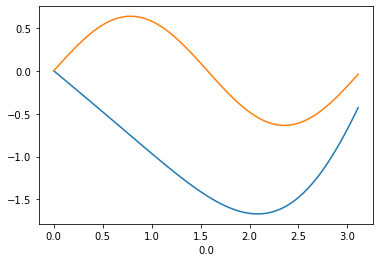

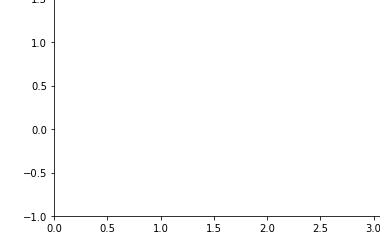

In [175]:
A=optimization(n,m,T,r)

In [176]:
x=t.tensor([i*(t.pi/n) for i in range(n+1)])

In [177]:
a=t.zeros(n+1)
for i in tq.tqdm(range(n+1)):
    a[i]=t.matmul(A[0],act(A[1]*x[i]))

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 24379.87it/s]


In [178]:
V=t.zeros(n)

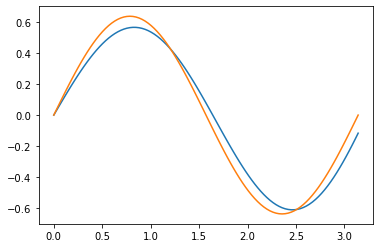

In [190]:
plt.plot(x,a)
plt.plot(x,(2/t.pi)*t.sin(2*x))

In [180]:
A

(tensor([-0.9371, -0.9512,  1.5726, -0.4679,  0.0999,  1.0875, -2.2261,  0.4537,
         -0.4155, -0.8734,  1.2653,  0.9488,  0.0648,  1.0623, -0.3759,  1.0683,
          0.8269,  1.0893,  0.2683, -0.3651, -0.8689,  0.9639,  0.9518, -0.0365,
          0.7624, -0.4784,  2.4903,  0.6931, -1.9957, -0.4911, -1.4992,  0.5655,
          2.1593,  0.4717,  0.1408,  1.2503,  0.5084,  1.5497,  0.8523, -0.2216]),
 tensor([ 0.5130, -0.5877, -0.7515,  0.2984, -0.8647, -1.0625, -0.2392,  0.7417,
          0.9128, -1.4803,  0.5555, -0.0701, -1.8052, -0.5854, -0.7035,  0.6393,
         -0.6897, -0.0960, -0.5926, -0.3580,  1.3786,  0.8008, -0.1114, -0.2290,
          0.8125, -0.5258, -0.4915,  1.2074,  1.2174, -1.9802, -1.4706, -1.4467,
         -0.3606,  1.9645,  0.5105,  0.5446, -2.0715,  0.7363,  0.8984,  0.0766]),
 tensor([2180.6106, 1420.2618, 1042.8054,  821.3148,  678.0877,  578.9052,
          506.4156,  451.0334,  407.1457,  371.2543,  341.1197,  315.2663,
          292.6864,  272.6801,  254.

([<matplotlib.lines.Line2D at 0x2ae422f2610>], tensor(28.9940))

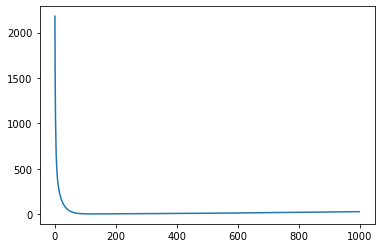

In [181]:
plt.plot(A[2]), A[2][-1]

In [182]:
t.matmul(A[0],act(A[1]*t.pi))

tensor(-0.1166)

In [189]:
L2(A[0],A[1],x)

tensor(0.5540)